# Aircraft Configuration GP example

This notebook is designed to test whether a simple simple comprised of bounding boxes can be generated using [deap](http://deap.readthedocs.io/en/master/api/tools.html), a Python Evolutionary Algorithm Package.

In [ ]:
import numpy as np
import pydot
from airconics.topology import Topology_GPTools, Topology

from IPython.display import Image, display

from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer

In [ ]:
topo_tools = Topology_GPTools(MaxAttachments=4)
# Try to compile a single individual and visualise both the tree and geometry
topo = topo_tools.randomize()

print(topo)

renderer = TornadoWebRenderer()
topo.Display(renderer)

display(renderer)
display(Image(topo.pydot_graph().create_png()))

In [ ]:
# For now, I'll have to do this by hand...
graph = """digraph G {
ranksep="0.1";
nodesep="0.1";
# splines=ortho;
node [style=filled];
edge [arrowhead=none];
subgraph cluster_standard {
color=invis;
0 [shape=ellipse, fillcolor="#136ed4", label=fuselage1, fontcolor="white"];
1 [shape=ellipse, label=<X<SUB>0</SUB>>];
2 [shape=ellipse, label=<Y<SUB>0</SUB>>];
3 [shape=ellipse, label=<Z<SUB>0</SUB>>];
4 [shape=ellipse, label=<SF>];
5 [shape=ellipse, label=<L<SUB>N</SUB>/L>];
6 [shape=ellipse, label=<L<SUB>T</SUB>/L>];
7 [shape=ellipse, label="L/D"];
8 [shape=box, fillcolor="#136ed4", label="mirror2", fontcolor="white"];
}

subgraph cluster_mirrored {
style=dashed;
9 [shape=box, fillcolor="#136ed4", label=liftingsurface0, fontcolor="white"];
10 [shape=ellipse, label=<<O>X</O><SUB>1</SUB>>];
11 [shape=ellipse, label=<<O>Y</O><SUB>1</SUB>>];
12 [shape=ellipse, label=<<O>Z</O><SUB>1</SUB>>];
13 [shape=ellipse, label=<<O>SF</O><SUB>1</SUB>>];
20 [shape=ellipse, label=<Shape_functs<SUB>1</SUB>>];

rank=same;
14 [shape=box, fillcolor="#136ed4", label=liftingsurface0, fontcolor="white"];
15 [shape=ellipse, label=<<O>X</O><SUB>2</SUB>>];
16 [shape=ellipse, label=<<O>Y</O><SUB>2</SUB>>];
17 [shape=ellipse, label=<<O>Z</O><SUB>2</SUB>>];
18 [shape=ellipse, label=<<O>SF</O><SUB>2</SUB>>];
21 [shape=ellipse, label=<Shape_functs<SUB>2</SUB>>];
}

0 -> 8;
8-> 9;
8 -> 14;

0 -> 1;
0 -> 2;
0 -> 3;
0 -> 4;
0 -> 5;
0 -> 6;
0 -> 7;
# 0 -> 9;
# 0 -> 14;
9 -> 10;
9 -> 11;
9 -> 12;
9 -> 13;
9-> 20;
14 -> 15;
14 -> 16;
14 -> 17;
14 -> 18;
14->21;
}
"""
dotgraph = pydot.graph_from_dot_data(graph)
# dotgraph.write_svg('/home/pchambers/Documents/PhD/SABTalk_2017/images/tree1.svg')
Image(dotgraph.create_png())

In [ ]:
# dotgraph.write_pdf('/home/pchambers/Documents/PhD/Aviation2017/aviation_2017_paper/figure/gplayout_tree2.pdf')

## Conventional Airliner

In [ ]:
import os, airconics
from airconics import Topology
from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer
from IPython.display import Image, display

topo = Topology()

fname = os.path.join(os.path.dirname(airconics.__file__),'resources/configuration_app/presets/airliner.json')

topo.from_file(fname)

renderer = TornadoWebRenderer()

topo.Display(renderer)

display(Image(topo.pydot_graph().create_png()))

renderer

## General Atomics MQ-1 Predator

### Aircraft configuration from JSON files

User defined JSON can be used to create new component hierarchies using the `Topology_GPTools.from_file` or `from_JSON` methods. This offers an interface for describing new aircraft layouts that is human-readable. The format is described in the table below; see the [presets directory](https://github.com/p-chambers/occ_airconics/tree/v0.3-dev/airconics/resources/configuration_app/presets) on github for examples.

<b>Notes:
* Attributes are not order sensitive, but each of the named attributes must appear once
* The `<N>` should be replaced with a number describing the number of descendent
* The order that component fitting primitives appear in the JSON file DOES affect the result
    - If a component with two sub attachments (`liftingsurface2`) appears in the file, the following two components will be sub geometries of that lifting surface. 
* Scalar variable inputs are all expected to lie between 0 and 1, unless otherwise specified; this dimensionless value is then used to fit the geometry to its parent.
* The lifting surface `Type` attribute can be any of keys the pre-defined wing types `airconics.topology.LSURF_FUNCTIONS` dictionary, e.g., `"AirlinerWing"`, `"TaperedWing"`, etc.
</b>.

<table>
	<col width="3">
	<col width="6">
	<tr>
		<th>Primitive Name</th>
		<th>Attributes</th>
	</tr>
	<tr>
		<td>liftingsurfaceN</td>
		<td>$X$ : longitudinal position, scalar<br>
$Y$ : lateral position, scalar<br>
$Z$ : vertical position, scalar<br>
ChordFactor : scalar<br>
ScaleFactor : scalar<br>
Rotation : scalar (−1 < Rotation < 1)<br>
Type : wing type, string (see **notes** above)</td>
	</tr>
	<tr>
		<td>fuselageN</td>
		<td>$X$ : longitudinal position, scalar<br>
$Y$ : lateral position, scalar<br>
$Z$ : vertical position, scalar<br>
XScaleFactor : scalar<br>
NoseLengthRatio : scalar<br>
TailLengthRatio : scalar<br>
FinenessRatio : scalar	</td>
	</tr>
	<tr>
		<td>mirrorN</td>
		<td>None. This primitive simply mirrors N direct descendants, and their associated subtrees, in the $XZ$ plane.</td>
	</tr>
</table>


We'll use the [predator example](https://github.com/p-chambers/occ_airconics/blob/v0.3-dev/airconics/resources/configuration_app/presets/predator.json) here for demonstration.

In [ ]:
import os, airconics
from airconics import Topology
from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer
from IPython.display import Image, display

topo = Topology()

fname = os.path.join(os.path.dirname(airconics.__file__),'resources/configuration_app/presets/proteus.json')

topo.from_file(fname)

renderer = TornadoWebRenderer()

topo.Display(renderer)

display(Image(topo.pydot_graph().create_png()))

renderer

Why not also try creating one from scratch? Let's aim for the Scaled Composites Proteus:

![SC Proteus aircraft](Proteus.jpg)
**Photo source: NASA**

In [ ]:
import os, airconics
from airconics import Topology
import numpy as np
import pydot
from airconics.topology import Topology_GPTools
from IPython.display import Image, display
from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer

# Note that we don't have to do anything special to turn a list of
# dictionaries into json format before calling topo_tools.from_json:
#  The primtives_array is already in json format!
primitives_array = [
  {
    "primitive": "fuselage1", 
    "args": {
        "X": 0.0, 
        "Y": 0.0, 
        "Z": 0.0,
        "XScaleFactor": 1.0,
        "NoseLengthRatio": 0.182,
        "TailLengthRatio": 0.293,
        "FinenessRatio": 1.0
      }
  },
  {
    "primitive": "mirror3"
  }, 
  {
    "primitive": "liftingsurface0",
    "args": {
        "X": 0.27, 
        "Y": 0.0, 
        "Z": 0.68,     
        "ScaleFactor": 0.42,
        "ChordFactor": 0.22,
        "Rotation": 0.05, 
        "Type": "StraightWing"
    }
  },
  {
    "primitive": "engine0",
    "args": {
        "SpanStation": 0.7,
        "XChordFactor": 0.16,
        "DiameterLenRatio": 0.21,
        "PylonSweep": 0.5,
        "PylonLenRatio": 0.5,
        "Rotation": 3*np.pi/4.
    }
},

  {
    "primitive": "liftingsurface1", 
    "args": {
        "X": 0.77,
        "Y": 0.0, 
        "Z": 0.3, 
        "ChordFactor": 0.8, 
        "ScaleFactor": 0.14,
        "Rotation": 0.09, 
        "Type": "StraightWing"
    }
  },
  {
    "primitive": "fuselage3", 
    "args": {
        "X": 1.0, 
        "Y": 1.0, 
        "Z": 1.0,
        "XScaleFactor": 2.8,
        "NoseLengthRatio": 0.182,
        "TailLengthRatio": 0.293,
        "FinenessRatio": 1.0
    }
  }, 
  {
    "primitive": "liftingsurface1",
    "args": {
        "X": 0.0, 
        "Y": 0.0, 
        "Z": 0.0,     
        "ScaleFactor": 0.9,
        "ChordFactor": 0.31,
        "Rotation": 0.09, 
        "Type": "StraightWing"
    }
  },
  {
    "primitive": "liftingsurface0",
    "args": {
        "X": 1.0,
        "Y": 1.0, 
        "Z": 1.0, 
        "ChordFactor": 0.42,
        "ScaleFactor": 0.7,
        "Rotation": -0.16, 
        "Type": "TaperedWing"
    }
  }, 
  {
    "primitive": "liftingsurface0",
    "args": {
        "X": 0.67,
        "Y": 0.0, 
        "Z": 0.1, 
        "ChordFactor": 1.0,
        "ScaleFactor": 0.4,
        "Rotation": -np.pi/2., 
        "Type": "AirlinerFin"
    }
  }, 
  {
    "primitive": "liftingsurface0",
    "args": {
        "X": 0.67,
        "Y": 0.0, 
        "Z": 0.9, 
        "ChordFactor": 1.0, 
        "ScaleFactor": 0.42,
        "Rotation": np.pi/2., 
        "Type": "AirlinerFin"
    }
  }
]

topo = Topology(SimplificationReqd=True)
topo.from_json(primitives_array)
# topo.Write('Proteus.step')

renderer = TornadoWebRenderer()

topo.Display(renderer)

display(Image(topo.pydot_graph().create_png()))

renderer
topo.to_json()

## Optimisation

**Note**: The optimisation setup code provided here is already included in the `Topology_GPTools` class, and can be used as default via the `Topology_GPTools.optimize` method. It is included here for those interested in how the evolutionary algorithm operates.

### The Objective Function

User-defined functions for the topology optimisation are catered for in the `Topology_GPTools` class. The function should take in a `Topology` (See: `airconics.topology.Topology`), and return a single number: default behaviour is that this measure of fitness will be maximised, i.e., topologies with a greater value returned by this function will be selected more favourably for mutation, reproduction, etc.

The objective function shown below will be used to maximise the similarity of an individuals component tree to a reference case: the airliner model. With this setup, the evolutionary algorithm will be subject to a simple test case for the genetic algorithm: that is, to test if the evolutionary process can obtain a given solution, without giving it any knowledge of what the solution is.

Considering that 'success' in this case would be achieved if the algorithm yields a geometry and configuration that is suitably (visually?) similar to the airliner model, results of interest should be,

* what population size, and number of generations gives a good probability of 'success'
* 

In [ ]:
0.513 * 0.9

In [2]:
from airconics.topology import Topology_GPTools, Topology, create_diffed_fitness
import os
import numpy as np
from IPython.display import Image, display
from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer
import airconics

# Use the proteus.json preset to 'diff' against
fname_reference = os.path.join(os.path.dirname(airconics.__file__),
                     'resources/configuration_app/presets/proteus.json')
diffed_fitness = create_diffed_fitness(fname_reference)

[{'primitive': 'fuselage1', 'args': {'TailLengthRatio': 0.293, 'XScaleFactor': 1.0, 'NoseLengthRatio': 0.182, 'Y': 0.0, 'X': 0.0, 'Z': 0.0, 'FinenessRatio': 1.0}}, {'primitive': 'mirror3', 'args': {}}, {'primitive': 'liftingsurface0', 'args': {'Type': u'StraightWing', 'ScaleFactor': 0.42, 'Y': 0.0, 'X': 0.27, 'Rotation': 0.05, 'Z': 0.68, 'ChordFactor': 0.22}}, {'primitive': 'engine0', 'args': {'XChordFactor': 0.16, 'PylonSweep': 0.5, 'DiameterLenRatio': 0.21, 'Rotation': 2.356194490192345, 'PylonLenRatio': 0.5, 'SpanStation': 0.7}}, {'primitive': 'liftingsurface1', 'args': {'Type': u'StraightWing', 'ScaleFactor': 0.14, 'Y': 0.0, 'X': 0.77, 'Rotation': 0.09, 'Z': 0.3, 'ChordFactor': 0.8}}, {'primitive': 'fuselage3', 'args': {'TailLengthRatio': 0.293, 'XScaleFactor': 2.8, 'NoseLengthRatio': 0.182, 'Y': 1.0, 'X': 1.0, 'Z': 1.0, 'FinenessRatio': 1.0}}, {'primitive': 'liftingsurface1', 'args': {'Type': u'StraightWing', 'ScaleFactor': 0.9, 'Y': 0.0, 'X': 0.0, 'Rotation': 0.09, 'Z': 0.0, 'Cho

In [3]:
# Check that the fitness function gives back a zero if the tree is exactly the same
topo = Topology()

topo.from_file(fname_reference)

tree_json = topo.to_json()
tree_components = [node['primitive'] for node in tree_json]



print(diffed_fitness(topo))
assert(diffed_fitness(topo) == 0)

0.0


### Evolution Setup

In [6]:
from deap import tools, gp, algorithms
from airconics.topology import generate_topology
import random 

random.seed(10)

# The below are the default settings for Topology_GPTools, and are
# included for illustration. See docs or help for explanation of inputs
topo_tools = Topology_GPTools(MaxAttachments=4,
                              min_levels=2,
                              max_levels=4,
                              min_mut=1,
                              max_mut=3,
                              fitness_funct=diffed_fitness,
                             fitness_weights=(-1.0,),
                             history=True)  # Minimization!


# For now, I'll remove the construction of the geometry. This part
# takes time, and the current fitness function doesn't require a
# full CAD model - full scale analysis simulation would leave this in.
def eval_topology_treeonly(individual):
    # simulate a topology run
    topo = airconics.Topology()
    topo._deap_tree = individual
    return diffed_fitness(topo),

topo_tools._toolbox.register("evaluate", eval_topology_treeonly)


# This is small in GP, but this is used for demonstration purposes.
# Larger scale simulations should have a much larger population.
popsize = 4000

import time
t = time.time()
population, logbook, hof, gen_best = topo_tools.optimize(n=popsize, cxpd=0.5, mutpd=0.2, ngen=200)
print("Evolution took {} seconds".format(time.time() - t))

# get the best individual and rerun it:
best = hof[0]
best_topology = topo_tools.spawn_topology(best)

renderer = TornadoWebRenderer()

best_topology.Display(renderer)

renderer

gen	nevals	avg    	std    	min    	max 
0  	4000  	771.108	114.887	356.076	1000
1  	2392  	642.506	80.762 	355.968	1000
2  	2390  	557.629	70.5366	355.821	1000
3  	2316  	491.768	68.1921	220.734	1000
4  	2354  	442.313	66.6255	220.734	1000
5  	2426  	406.018	79.2834	212.002	1000
6  	2381  	370.742	82.1168	200.56 	1000
7  	2482  	337.081	82.9681	200.56 	1000
8  	2468  	293.598	83.5554	125.326	1000
9  	2387  	255.452	78.3538	125.951	1000
10 	2457  	234.792	74.5252	115.95 	1000
11 	2472  	229.604	84.7845	115.95 	1000
12 	2437  	214.837	80.2267	88.3296	1000
13 	2443  	195.859	86.3079	78.0579	1000
14 	2406  	172.035	95.8791	68.0011	1000
15 	2390  	158.729	97.0249	46.2674	843.776
16 	2343  	147.382	102.491	45.8611	1000   
17 	2438  	129.672	102.127	26.0837	1000   
18 	2362  	112.292	98.0752	26.0453	1000   
19 	2394  	102.095	104.889	25.6378	1000   
20 	2399  	93.0761	115.468	15.4979	1000   
21 	2341  	77.0004	105.008	15.2879	1000   
22 	2449  	70.7479	110.252	15.2879	1000   
23 	2423  	66.35

<TornadoWebRenderer at http://PChambers_ngcm:44466/get/1dad1ab8ca364f8293b38b323885e4a6>

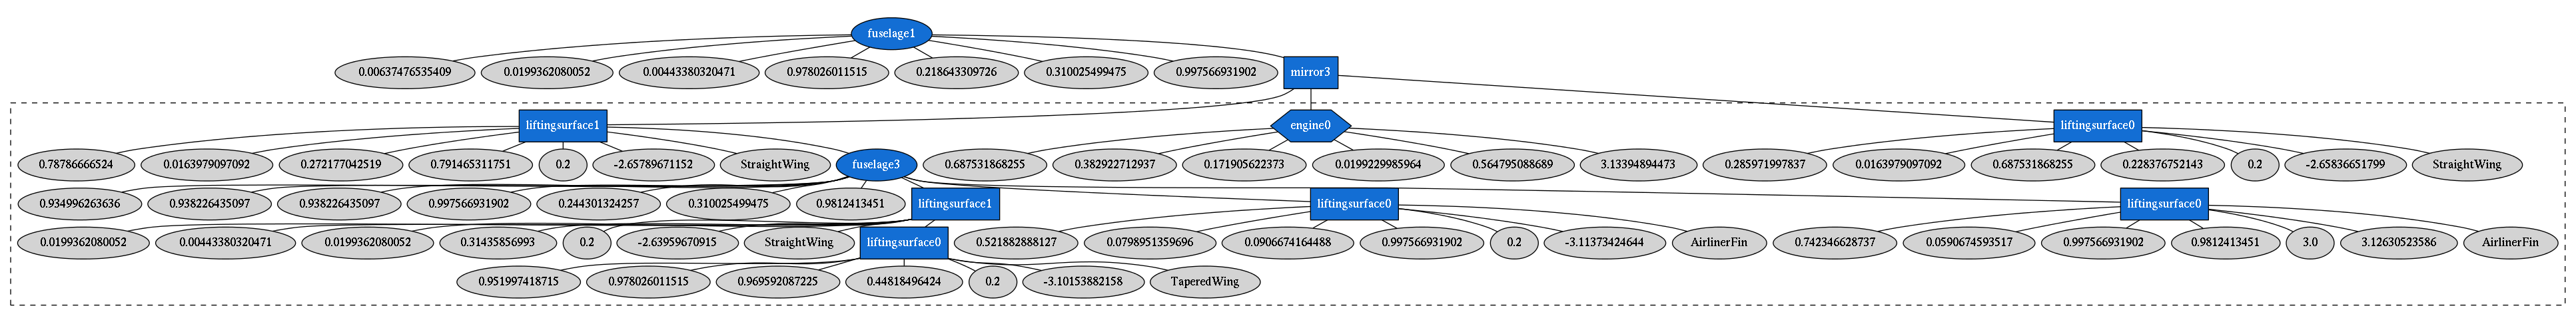

In [7]:
display(Image(best_topology.pydot_graph().create_png()))

In [9]:
best = hof[0]
best_topology = topo_tools.spawn_topology(best)

best_topology.write_json('temp.json')

In [ ]:
# Get the worst individual from the hall of fame (this is actually the 100th best)
last = hof[-1]
    

# get the best individual and rerun it:
last_topology = topo_tools.run(last)

renderer = TornadoWebRenderer()

last_topology.Display(renderer)

renderer

In [ ]:
# Here's some code for creating the network diagram, but the
# diagram doesn't show a lot, and can take a long time to generate:
#  leaving this commented out for now.

# import networkx
# import matplotlib.pyplot as plt
# %matplotlib notebook

# graph = networkx.DiGraph(topo_tools.history.getGenealogy(best))
# graph = graph.reverse()     # Make the grah top-down

# colors = [topo_tools._toolbox.evaluate(topo_tools.history.genealogy_history[i])[0] for i in graph]
# networkx.draw(graph, node_color=colors, show='ipynb')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Write and plot the accompanying statistics of the evolution
gen, best, worst, avg = logbook.select("gen", "min", "max", "avg")
log_array = np.column_stack([gen, best, worst, avg])
# print(log_array)
np.savetxt('log.txt', log_array, header='gen    best(min)    worst    avg')

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, best, 'b-', label=r'Best')
ax1.plot(gen, worst, 'r-', label=r'Worst')
ax1.plot(gen, avg, 'g-', label=r'Avg')

ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness')
ax1.legend(loc="upper right")

In [ ]:
# inds = [topo_tools.run(topo_tools.history.genealogy_history[i]) for i in topo_tools.history.getGenealogy(best)]


## Evolution Animation

Note that the below code does not produce the rendered images of the `.stp` geometry files to be used as frames in the animation: this step is currently done in Rhino, which produces better quality renderings.

In [ ]:
# Write the best geometry in each generation as step
# for i, ind in enumerate(gen_best):
#     topo = topo_tools.run(ind)
#     path = '/home/pchambers/Documents/Vbox_share/gp_geometries'
#     fout = os.path.join(path, 'gen{:03}.stp'.format(i))
#     topo.Write(fout)

## Local optimisation 

In [ ]:
# The below are the default settings for Topology_GPTools, and are
# included for illustration. See docs or help for explanation of inputs
topo_tools = Topology_GPTools(MaxAttachments=4,
                              min_levels=2,
                              max_levels=4,
                              min_mut=1,
                              max_mut=3,
                              fitness_funct=diffed_airliner_fitness,
                             fitness_weights=(-1.0,))  # Minimization!


# For now, I'll remove the construction of the geometry. This part
# takes time, and the current fitness function doesn't require a
# full CAD model - full scale analysis simulation would leave this in.
def eval_topology_treeonly(individual):
    # simulate a topology run
    topo = topo_tools.spawn_topology(individual, construct_geometry=False)
    return diffed_airliner_fitness(topo),

topo_tools._toolbox.register("evaluate", eval_topology_treeonly)


# This is small in GP, but this is used for demonstration purposes.
# Larger scale simulations should have a much larger population.
popsize = 200

ngen = 50

for i in range(ngen)
    topo_tools._toolbox.population, logbook, hof = topo_tools.optimize(
        n=popsize, cxpd=0.5, mutpd=0.2, ngen=100)

# if hof[0].fitness.values() < 1.:
#     Do some local optimisation
best = hof[0]
#     for 
    

# get the best individual and rerun it:
best_topology = topo_tools.run(best)


In [ ]:
from deap import gp
import copy
import types

best = hof[0]
best_copy = copy.deepcopy(best)

n_terms = sum(1 if node issubclass(node, gp.Terminal) else 0 for node in best)

pset2 = PrimitiveSetTyped("TUNING", [float]*nterms, types.NoneType)

for i, node in enumerate(best):
    if issubclass(node, gp.Terminal):
        topo_tools._pset.addTerminal('var{}'.format(i))
        best_copy[i] = variables[-1]
    else:
        


In [ ]:
topo_tools = Topology_GPTools(MaxAttachments=3,
                              min_levels=2,
                              max_levels=4,
                              min_mut=1,
                              max_mut=3,
                              fitness_funct=diffed_airliner_fitness,
                             fitness_weights=(-1.0,),
                             history=True)  # Minimization!

ind = topo_tools._toolbox.individual()
topo = topo_tools.run(ind)
g = topo.pydot_graph()
g.create_fig()
# display(Image(topo.pydot_graph().create_png()))
# 
# renderer = TornadoWebRenderer()
# topo.Display(renderer)
# renderer